####        Բաղդասարյան Սուրեն   ՝                                                       Bank Marketing Campaign Dataset


Individual Project

Select a dataset that interests you the most from Kaggle:
Find Open Datasets and Machine Learning Projects | Kaggle

Conduct analysis of the dataset. It should include data preprocessing, hypothesis based on the latter, data visualisations ( at least 5), summary/conclusions of the analysis and presentation.

Grade Breakdown: (5 points)

	Data Preprocessing (1)
	Visualisations (1.5)
	Meaningful analysis (1)
	Presentation (1)
	Novelty Component (0.5)

Deadline for Submission: April 11
25% of the final grade
________________________________________
Presentation: April 13    



In [398]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [399]:
df = pd.read_csv("C:/Users/HP/Desktop/dataset.KEGGEL.csv")

In [400]:
df

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted
...,...,...,...,...,...,...,...,...,...,...,...
45206,administrative_staff,50,high_school,divorced,mobile,May,6,114,1,unsuccessful,not_converted
45207,independent_worker,49,college,married,unidentified,May,13,98,1,unidentified,not_converted
45208,executive,30,college,married,mobile,June,12,175,2,other_outcome,not_converted
45209,retired_worker,59,elementary_school,married,landline,July,15,41,5,unidentified,not_converted


In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   occupation                 45211 non-null  object
 1   age                        45211 non-null  int64 
 2   education_level            45211 non-null  object
 3   marital_status             45211 non-null  object
 4   communication_channel      45211 non-null  object
 5   call_month                 45211 non-null  object
 6   call_day                   45211 non-null  int64 
 7   call_duration              45211 non-null  int64 
 8   call_frequency             45211 non-null  int64 
 9   previous_campaign_outcome  45211 non-null  object
 10  conversion_status          45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [402]:
df.isnull().sum()

occupation                   0
age                          0
education_level              0
marital_status               0
communication_channel        0
call_month                   0
call_day                     0
call_duration                0
call_frequency               0
previous_campaign_outcome    0
conversion_status            0
dtype: int64

In [403]:
df.describe(include = "object")

,occupation,education_level,marital_status,communication_channel,call_month,previous_campaign_outcome,conversion_status
count,45211,45211,45211,45211,45211,45211,45211
unique,12,4,3,3,12,4,2
top,manual_worker,high_school,married,mobile,May,unidentified,not_converted
freq,9732,23202,27214,29285,13766,36959,39922


In [404]:
df.describe().round()

,age,call_day,call_duration,call_frequency
count,45211.0,45211.0,45211.0,45211.0
mean,41.0,16.0,258.0,3.0
std,11.0,8.0,258.0,3.0
min,18.0,1.0,0.0,1.0
25%,33.0,8.0,103.0,1.0
50%,39.0,16.0,180.0,2.0
75%,48.0,21.0,319.0,3.0
max,95.0,31.0,4918.0,63.0


In [405]:
df["previous_campaign_outcome"].unique()

array(['successful', 'unidentified', 'unsuccessful', 'other_outcome'],
      dtype=object)

In [406]:
df_filtered = df[~df['previous_campaign_outcome'].isin(['other_outcome', 'unidentified'])]

In [407]:
df_filtered

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
7,retired_worker,68,college,married,mobile,August,4,651,1,successful,converted
8,student,22,college,single,mobile,November,30,260,5,successful,converted
16,administrative_staff,46,high_school,married,mobile,April,20,239,2,unsuccessful,not_converted
18,retired_worker,58,high_school,single,mobile,February,4,72,6,unsuccessful,not_converted
...,...,...,...,...,...,...,...,...,...,...,...
45173,technical_specialist,34,high_school,single,mobile,April,16,204,1,unsuccessful,not_converted
45177,jobless,54,high_school,married,mobile,May,25,352,3,unsuccessful,converted
45181,technical_specialist,45,high_school,married,mobile,February,5,617,4,unsuccessful,not_converted
45197,retired_worker,72,elementary_school,married,landline,March,23,255,1,successful,converted


In [408]:

df_filtered.loc[:, 'call_frequency_group'] = pd.cut(df_filtered['call_frequency'], bins=[0, 2, 4, float('inf')], labels=['up to 2 calls', '3 - 4 calls', '4 and more calls'], right=False)


C:\Users\HP\AppData\Local\Temp\ipykernel_16540\3456441538.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [409]:
df_filtered

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status,call_frequency_group
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted,up to 2 calls
7,retired_worker,68,college,married,mobile,August,4,651,1,successful,converted,up to 2 calls
8,student,22,college,single,mobile,November,30,260,5,successful,converted,4 and more calls
16,administrative_staff,46,high_school,married,mobile,April,20,239,2,unsuccessful,not_converted,3 - 4 calls
18,retired_worker,58,high_school,single,mobile,February,4,72,6,unsuccessful,not_converted,4 and more calls
...,...,...,...,...,...,...,...,...,...,...,...,...
45173,technical_specialist,34,high_school,single,mobile,April,16,204,1,unsuccessful,not_converted,up to 2 calls
45177,jobless,54,high_school,married,mobile,May,25,352,3,unsuccessful,converted,3 - 4 calls
45181,technical_specialist,45,high_school,married,mobile,February,5,617,4,unsuccessful,not_converted,4 and more calls
45197,retired_worker,72,elementary_school,married,landline,March,23,255,1,successful,converted,up to 2 calls


In [410]:
df["conversion_status"].unique()

array(['not_converted', 'converted'], dtype=object)

In [411]:
successful_df = df_filtered[df_filtered['previous_campaign_outcome'] == 'successful']
unsuccessful_df = df_filtered[df_filtered['previous_campaign_outcome'] == 'unsuccessful']

successful_count = successful_df.shape[0]
unsuccessful_count = unsuccessful_df.shape[0]

print("Total number of successful conversions:", successful_count)
print("Total number of unsuccessful conversions:", unsuccessful_count)

Total number of successful conversions: 1511
Total number of unsuccessful conversions: 4901


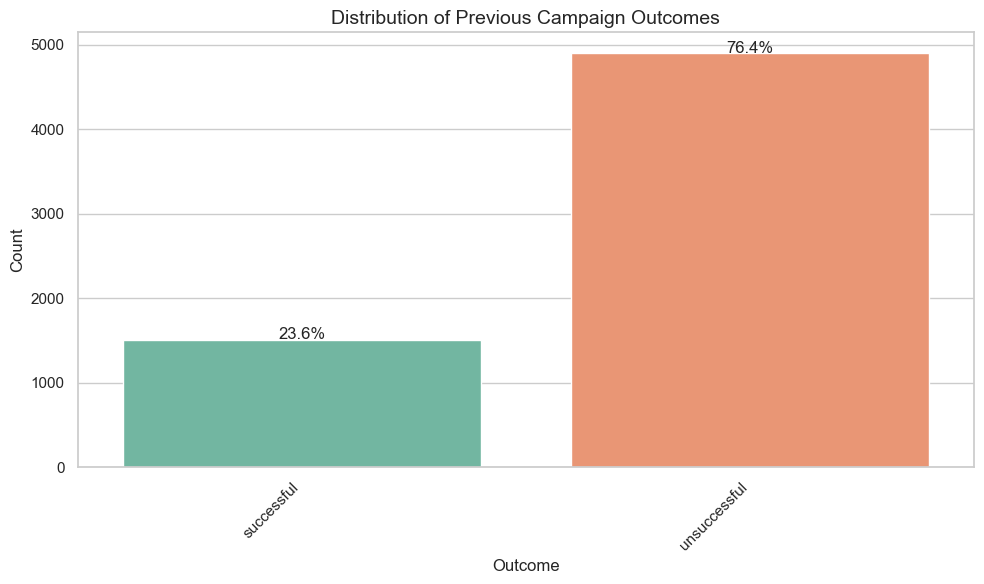

In [412]:
# Plotting parameters
sns.set(style="whitegrid")

# Plotting the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='previous_campaign_outcome', data=df_filtered, palette='Set2')

# Customizing the plot
plt.title('Distribution of Previous Campaign Outcomes', fontsize=14)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding percentage labels
total_count = len(df_filtered)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height/total_count:.1%}', ha='center')

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [413]:
# Create a cross-tabulation of previous_campaign_outcome and conversion_status
cross_tab = pd.crosstab(df_filtered['previous_campaign_outcome'], df_filtered['conversion_status'])

print("Cross-tabulation of Previous Campaign Outcome and Conversion Status:")
print(cross_tab)


Cross-tabulation of Previous Campaign Outcome and Conversion Status:
conversion_status          converted  not_converted
previous_campaign_outcome                          
successful                       978            533
unsuccessful                     618           4283


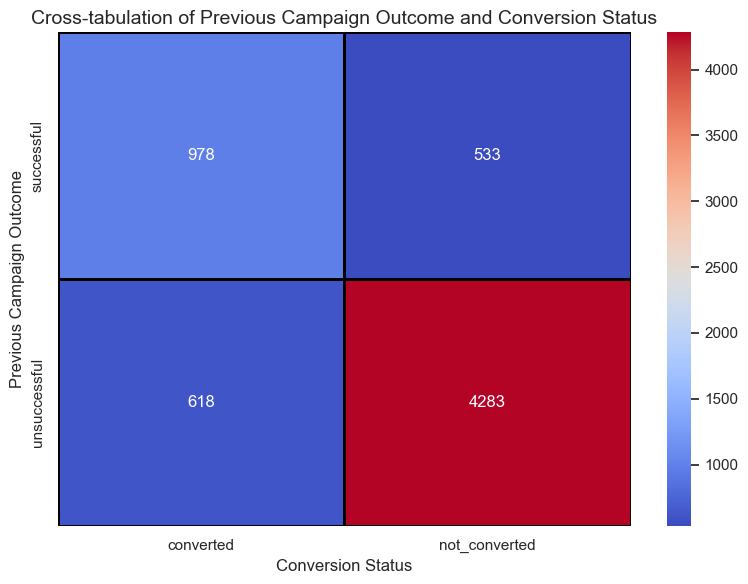

In [414]:
# Create a cross-tabulation of previous_campaign_outcome and conversion_status
cross_tab = pd.crosstab(df_filtered['previous_campaign_outcome'], df_filtered['conversion_status'])

# Plotting parameters
plt.figure(figsize=(8, 6))

# Plotting the heatmap
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm', linewidths=1, linecolor='black')

# Customizing the plot
plt.title('Cross-tabulation of Previous Campaign Outcome and Conversion Status', fontsize=14)
plt.xlabel('Conversion Status', fontsize=12)
plt.ylabel('Previous Campaign Outcome', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


In [415]:
# Filter for customers who were unsuccessful in the previous campaign and changed to converted
changed_customers = df_filtered[(df_filtered['previous_campaign_outcome'] == 'unsuccessful') & 
                                (df_filtered['conversion_status'] == 'converted')]

changed_customers

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status,call_frequency_group
74,executive,32,college,single,mobile,September,8,519,1,unsuccessful,converted,up to 2 calls
112,administrative_staff,36,college,single,mobile,February,5,195,1,unsuccessful,converted,up to 2 calls
183,business_owner,54,unidentified,divorced,landline,April,6,475,6,unsuccessful,converted,4 and more calls
188,administrative_staff,38,high_school,married,mobile,March,3,136,2,unsuccessful,converted,3 - 4 calls
315,student,32,college,single,mobile,June,30,598,4,unsuccessful,converted,4 and more calls
...,...,...,...,...,...,...,...,...,...,...,...,...
44814,technical_specialist,32,high_school,single,mobile,May,18,442,1,unsuccessful,converted,up to 2 calls
44968,administrative_staff,38,high_school,single,mobile,February,3,315,2,unsuccessful,converted,3 - 4 calls
45086,manual_worker,40,elementary_school,married,mobile,May,13,873,3,unsuccessful,converted,3 - 4 calls
45159,executive,39,college,married,mobile,October,6,608,1,unsuccessful,converted,up to 2 calls


In [416]:
changed_customers.describe().round()

,age,call_day,call_duration,call_frequency
count,618.0,618.0,618.0,618.0
mean,41.0,14.0,459.0,2.0
std,13.0,8.0,327.0,1.0
min,20.0,1.0,61.0,1.0
25%,32.0,7.0,223.0,1.0
50%,38.0,14.0,352.0,1.0
75%,49.0,21.0,614.0,2.0
max,84.0,31.0,2184.0,8.0


In [417]:
# Calculate conversion rates by call frequency group as percentages
conversion_rates = df_filtered.groupby('call_frequency_group')['conversion_status'].value_counts(normalize=True).unstack() * 100
conversion_rates = conversion_rates.round(2) 
conversion_rates


conversion_status,converted,not_converted
call_frequency_group,,
up to 2 calls,27.31,72.69
3 - 4 calls,24.45,75.55
4 and more calls,14.88,85.12


In [479]:
# Define the intervals for call duration groups
bins = [0, 100, 200, 300, 400, float('inf')]  # Adjust the intervals as needed
labels = ['0-100 sec', '101-200 sec', '201-300 sec', '301-400 sec', '400+ sec']  # Labels for the groups

# Use pd.cut() to create the call_duration_group column
changed_customers['call_duration_group'] = pd.cut(changed_customers['call_duration'], bins=bins, labels=labels, right=False)



C:\Users\HP\AppData\Local\Temp\ipykernel_16540\4236304944.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [480]:
changed_customers

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status,call_frequency_group,call_duration_group
74,executive,32,college,single,mobile,September,8,519,1,unsuccessful,converted,up to 2 calls,400+ sec
112,administrative_staff,36,college,single,mobile,February,5,195,1,unsuccessful,converted,up to 2 calls,101-200 sec
183,business_owner,54,unidentified,divorced,landline,April,6,475,6,unsuccessful,converted,4 and more calls,400+ sec
188,administrative_staff,38,high_school,married,mobile,March,3,136,2,unsuccessful,converted,3 - 4 calls,101-200 sec
315,student,32,college,single,mobile,June,30,598,4,unsuccessful,converted,4 and more calls,400+ sec
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44814,technical_specialist,32,high_school,single,mobile,May,18,442,1,unsuccessful,converted,up to 2 calls,400+ sec
44968,administrative_staff,38,high_school,single,mobile,February,3,315,2,unsuccessful,converted,3 - 4 calls,301-400 sec
45086,manual_worker,40,elementary_school,married,mobile,May,13,873,3,unsuccessful,converted,3 - 4 calls,400+ sec
45159,executive,39,college,married,mobile,October,6,608,1,unsuccessful,converted,up to 2 calls,400+ sec


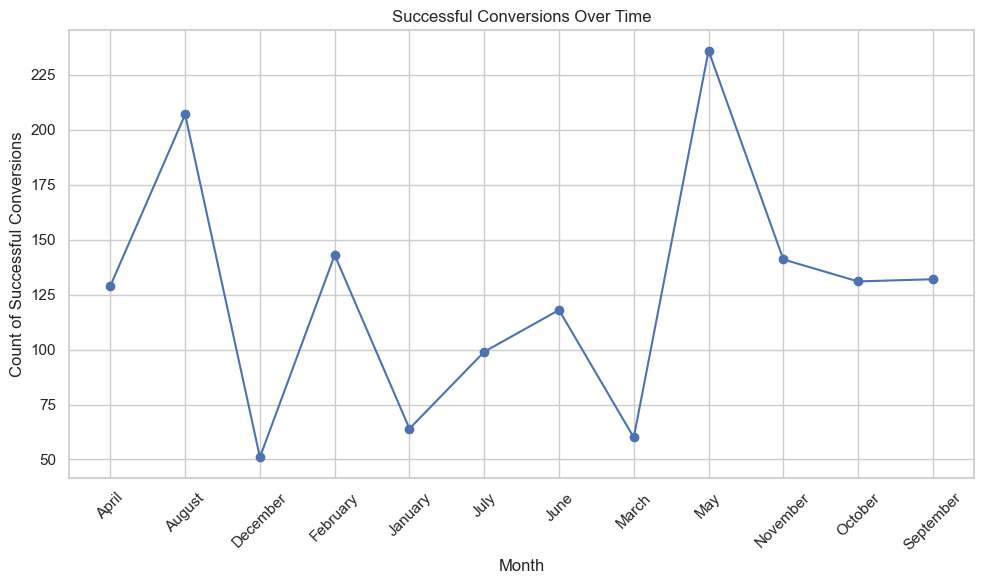

April: 129 Successfuls
August: 207 Successfuls
December: 51 Successfuls
February: 143 Successfuls
January: 64 Successfuls
July: 99 Successfuls
June: 118 Successfuls
March: 60 Successfuls
May: 236 Successfuls
November: 141 Successfuls
October: 131 Successfuls
September: 132 Successfuls


In [420]:
success_count_by_month = df[df['previous_campaign_outcome'] == 'successful'].groupby('call_month').size()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(success_count_by_month.index, success_count_by_month.values, marker='o', linestyle='-')
plt.title('Successful Conversions Over Time')
plt.xlabel('Month')
plt.ylabel('Count of Successful Conversions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

for month, count in zip(success_count_by_month.index, success_count_by_month.values):
    print(f"{month}: {count} Successfuls")


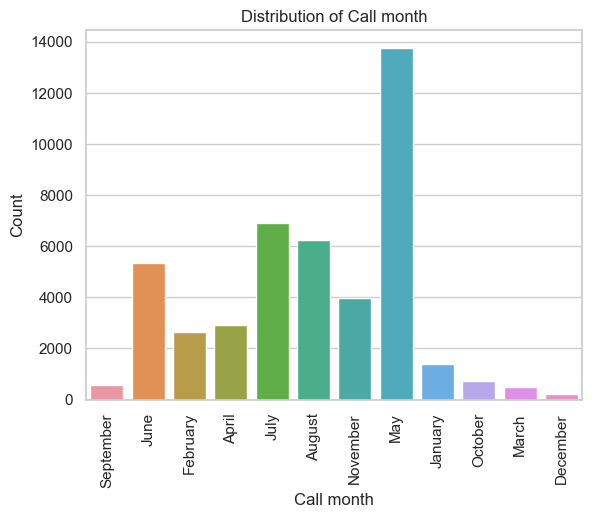

In [421]:
variables = ['call_month']

count_plots = {}

for var in variables:
    count_plots[var + '_ax'] = sns.countplot(x=var, data=df)
    plt.xticks(rotation=90)  
    plt.xlabel(var.capitalize().replace('_', ' '))
    plt.ylabel('Count')
    plt.title('Distribution of ' + var.capitalize().replace('_', ' '))
    plt.show()

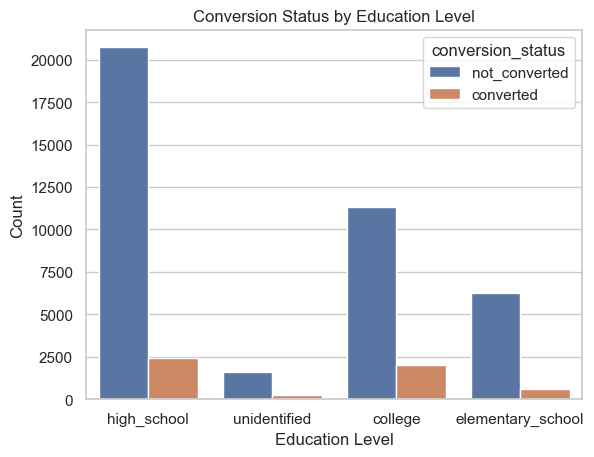

In [422]:
sns.countplot(x='education_level', hue='conversion_status', data=df)
plt.title('Conversion Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

### Ձևակերպենք զրոյական  և այլընտրանքային վարկածները 

Null Hypothesis (H0): Զրոյական վարկածով ենթադրում ենք որ զանգի տևողությունը էական ազդեցություն չունի [converted] և [not converted] հաճախորդների խմբերի վրա, այսինք այս խմբերում զանգի տևողության զգալի տարբերություն չկա։

Alternative Hypothesis (H1): Այլընտրանքային վարկածով ենթադրում ենք, որ կա զանգի տևողության զգալի տարբերություն նշված երկու խմբերում։


                     count        mean         std  min    25%    50%    75%  \
conversion_status                                                              
converted           5289.0  537.294574  392.525262  8.0  244.0  426.0  725.0   
not_converted      39922.0  221.182806  207.383237  0.0   95.0  164.0  279.0   

                      max  
conversion_status          
converted          3881.0  
not_converted      4918.0  


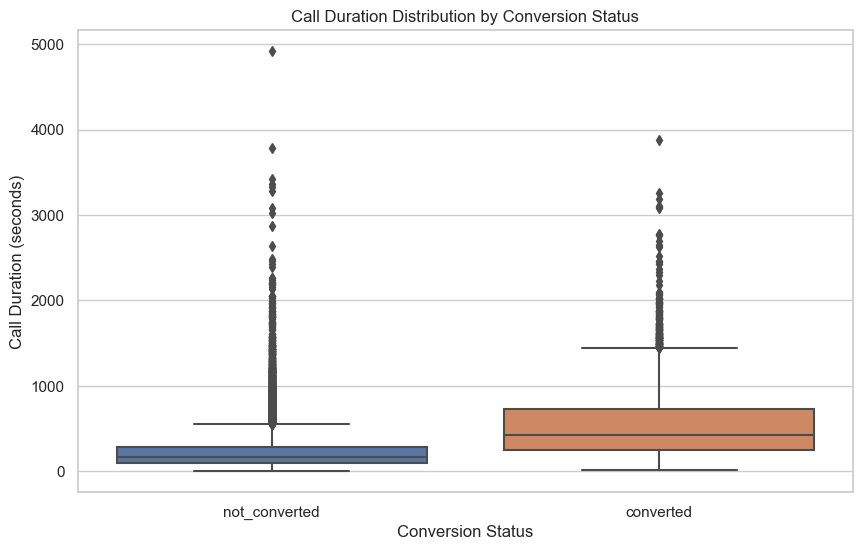

In [423]:
# Summary statistics of call_duration by conversion_status
print(df.groupby('conversion_status')['call_duration'].describe())

# Visualize distribution of call_duration by conversion_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='conversion_status', y='call_duration', data=df)
plt.title('Call Duration Distribution by Conversion Status')
plt.xlabel('Conversion Status')
plt.ylabel('Call Duration (seconds)')
plt.show()


In [424]:
from scipy.stats import ttest_ind

# Separate call durations for converted and not converted customers
call_duration_converted = df[df['conversion_status'] == 'converted']['call_duration']
call_duration_not_converted = df[df['conversion_status'] == 'not_converted']['call_duration']

# Perform independent t-test to compare means
t_stat, p_value = ttest_ind(call_duration_converted, call_duration_not_converted, equal_var=False)

# Print t-statistic and p-value
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Մերժեք զրոյական վարկածը։ 'converted' և 'not_converted' հաճախորդների  միջև կա զանգի տևողության զգալի տարբերություն։")
else:
    print("Չենք կարող մերժել զրոյական վարկածը։ 'converted' և 'not_converted' հաճախորդների միջև զանգի տևողության էական տարբերություն չկա:")


T-statistic: 57.51
P-value: 0.0000
Մերժեք զրոյական վարկածը։ 'converted' և 'not_converted' հաճախորդների  միջև կա զանգի տևողության զգալի տարբերություն։


### The t-statistic value of 57.51- արժեքը ցույց է տալիս 'converted' և 'not_converted' հաճախորդների միջև զանգերի միջին տևողության չափազանց մեծ տարբերությունը,  և քանի որ p-value (0.0000)  փոքր է նշանակության մակարդակից (alpha = 0.05) ապա կարող ենք հստակ մերժել զրոյական վարկածը։

### Զանգի տևողության զգալի տարբերությունը 'converted' և 'not_converted'  հաճախորդների միջև ցույց է տալիս, որ զանգի տևողությունը կարող է փոխակերպման հավանականության նշանակալի կանխատեսող կամ ցուցիչ լինել: 
### Հաճախորդները, որոնց հետ ավելի երկար է եղել զանգի տևողությունը, ավելի հավանական է, որ փոխարկվեն, համեմատած  զանգերի ավելի կարճ տևողության հետ:

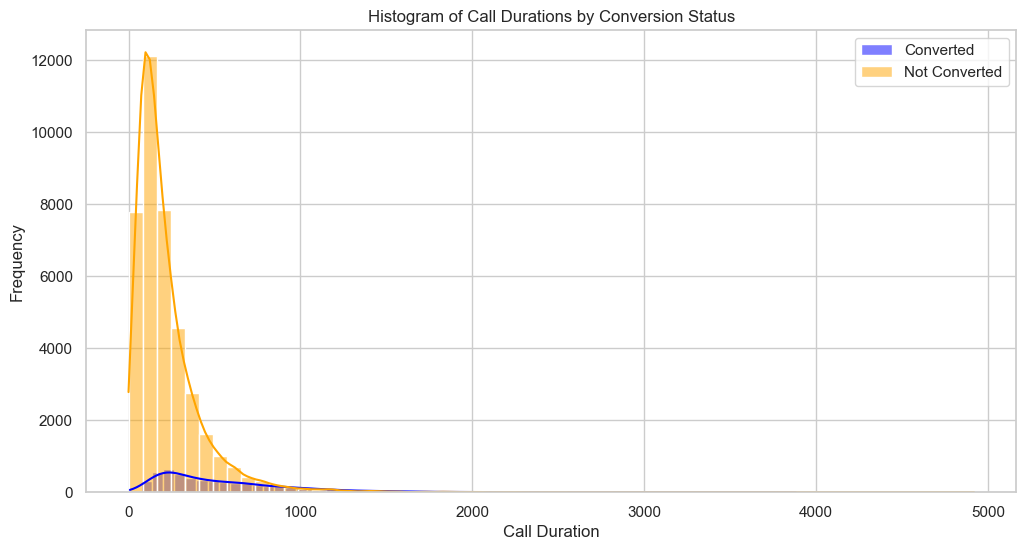

In [425]:
plt.figure(figsize=(12, 6))
sns.histplot(call_duration_converted, bins=60, kde=True, color='blue', label='Converted')
sns.histplot(call_duration_not_converted, bins=60, kde=True, color='orange', label='Not Converted')
plt.title('Histogram of Call Durations by Conversion Status')
plt.xlabel('Call Duration')
plt.ylabel('Frequency')
plt.legend()
plt.show()
